<a href="https://colab.research.google.com/github/fitditcorp4/research/blob/main/weekly_dataset02022023_plus_qtr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# imports library
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
#from pandas import datetime
from datetime import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
# plt.style.use('fivethirtyeight')
plt.style.use('classic')
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

In [5]:
from google.colab import data_table
data_table.enable_dataframe_formatter

<function google.colab.data_table.enable_dataframe_formatter()>

In [6]:
df0 = pd.read_json('https://oilspillmonitor.ng/api/spill-data.php?dataset=nosdra&format=json')

In [7]:
 df0

,id,status,company,incidentnumber,incidentdate,contaminant,estimatedquantity,sitelocationname,spillareahabitat,lastupdatedby,cause,updatefor,latitude,longitude,statesaffected,attachments,jivdate,lga,zonaloffice,certificatedate,certificatenumber,formadate,reportdate,spillstopdate,initialcontainmentmeasures,descriptionofimpact,formbdate,formcdate,jivpresent,typeoffacility,cleanupcompleteddate,cleanupmethods,cleanupdate,quantityrecovered,postcleanupinspectiondate,finalsamplingdate,estimatedspillarea,remediationstart,remediationtype,remediationend,postimpactassessmentdate,finallabresultsdate
0,2,confirmed,ADDAX,HSE/OBO/0611/101,2006-11-23,cr,225,Subsea Pipeline @ Mimbo Platform (OML123),of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,confirmed,ADDAX,HSE/OBO/0612/108,2006-12-18,cr,0.5,EBNE04HT @ Ebughu Platform (OML 123),of,NOSDRA,eqf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,confirmed,ADDAX,HSE/OBO/0612/110,2006-12-27,cr,25,South East of BOGI Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,confirmed,ADDAX,HSE/OBO/0706/166,2007-05-14,cr,2,Adanga Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,confirmed,ADDAX,HSE/OBO/0708/201,2007-08-16,gs,NaN,"Izombe Well #10LS 4"" Flowline",la,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16441,268129,confirmed,CHEVRON,NOSDRA/005/2023,2023-01-05,no,NaN,12'' ABITEYE-ESCRAVOS PIPELINE AT SAGHARA.,la,2023-02-08 WA003,sab,268129.0,5.6474167,5.2488333,DE,"[{""url"":""data/attachments/t18627578218/CJEVRON...",2023-01-31,Warri-South-West,wa,NaN,NaN,NaN,2023-01-06,NaN,NaN,4'' Hot valve installed at 12 O'clock position...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16442,268108,confirmed,TOTAL,TUCN/JVA/ON-002/2023,2023-01-30,cr,7,KM 23.253 OBAGI-RUMUEKPE CRUDE OIL EXPORT LINE...,la,2023-02-10 AB008,sab,268108.0,5.0446903,6.6928814,RI,"[{""url"":""data/attachments/268108/TotalEnergies...",2023-01-31,Emuoha,ph,NaN,NaN,NaN,2023-01-30,2023-01-31,tr,"Upon excavation and exposure, an hacksaw cut o...",NaN,NaN,"nosdra,dpr,mnstry,cmpny,cmmnt,plc",pl,NaN,NaN,NaN,5,NaN,NaN,0.00005000,NaN,NaN,NaN,NaN,NaN
16443,268175,confirmed,TOTAL,TUCN/JVA/0N-003/2023,2023-02-06,cr,42,KM 20.5 12'' OBAGI-RUMUEKPE EXPORT LINE AT EKPENA,"la,ss",2023-02-10 AB008,sab,268175.0,5.0685354,6.6899799,RI,"[{""url"":""data/attachments/268175/NOSDRA JIV FO...",2023-02-07,Ahoada-East,ph,NaN,NaN,NaN,2023-02-06,2023-02-07,bm,The Team assessed the spill area; found the so...,NaN,NaN,"nosdra,mnstry,dpr,cmpny,cmmnt",pl,NaN,NaN,NaN,35,NaN,NaN,0.00100561,NaN,NaN,NaN,NaN,NaN
16444,236556,confirmed,SEPLAT,SEPLAT/EA/OBMS/01/2022,2022-08-23,ch,103,"UMUGUMA UMUAGWO,ASSA ROAD,OHAJI, OHAJI/EGBEMA ...",la,2023-02-10 AB008,other:,236556.0,5.3758806,6.7955500,IM,"[{""url"":""data/attachments/236556/WhatsApp Imag...",2022-08-24,Ohaji/Egbema,ph,NaN,NaN,NaN,2022-08-23,2022-08-23,other:NONE,The spill was due to an accident involving a t...,NaN,NaN,"mltry,plc,cmmnt,cmpny,dpr,mnstry,nosdra",tk,2022-09-16,Manual,2022-09-03,NaN,NaN,NaN,0.000495,NaN,NaN,NaN,NaN,NaN


In [8]:
df1 = df0.loc[df0['status'].isin(['confirmed', 'reviewed'])]

In [9]:
#df1['incidentdate'].value_counts()

In [10]:
df1.replace(to_replace='20014-07-08', value='2014-07-08',inplace=True)  # Replaces a typograpical error
df1.replace(to_replace='2016-01-13 AB008', value='2016-01-13',inplace=True)
df1.replace(to_replace='2016-04-14 AB014', value='2016-01-13',inplace=True)
df1.replace(to_replace='2019-08-19 PH133', value='2019-08-19',inplace=True)
df1.replace(to_replace='2019-08-19 PH133, 2020-12-15 PH030, 2021-09-17 PH012, 2021-09-20 PH012, 2021-10-31 PH012', value='2019-08-19',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
df1.incidentdate.isna().sum()

590

In [12]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.reportdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.formadate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.jivdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.lastupdatedby

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
df1.incidentdate.isna().sum()

0

In [14]:
df1['contaminant'] = df1['contaminant'].fillna('notavailable')
df1.loc[df1['contaminant'].str.startswith('other'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('oth'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('re'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Die'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('not'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('Con'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('CON'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('co'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('NIL'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('LPFO'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Pro'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('sheen'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('Ass'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('gas'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('wa'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('F'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('0'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('gs'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('Crude'), 'contaminant'] = 'cr'
df1.loc[df1['contaminant'].str.startswith('crude'), 'contaminant'] = 'cr'

<ipython-input-14-25e6b16a420f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['contaminant'] = df1['contaminant'].fillna('notavailable')
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
df1.loc[df1['contaminant'].str.startswith('GAS'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('None'), 'contaminant'] = 'no'

In [16]:
df1.contaminant.unique()

array(['cr', 'ga', 'other', 'na', 'ch', 're', ' ', 'co', 'no',
       'Non-Leaking', 'Non leaking'], dtype=object)

In [17]:
df2 = df1.loc[df1['contaminant'].isin(['cr', 're', 'co', 'ch'])]

In [18]:
df2.estimatedquantity.isna().sum()

2340

In [19]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-19-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-19-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-19-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [20]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-20-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-20-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-20-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [21]:
df3 = df2.loc[(df2['incidentdate'] > '2005-12-31') & (df2['incidentdate'] <'2022-12-31')]

In [22]:
df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])

<ipython-input-22-3ce1f0b5bdb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])


In [23]:
df3.estimatedquantity = pd.to_numeric(df3.estimatedquantity, errors = 'coerce')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df3.columns

Index(['id', 'status', 'company', 'incidentnumber', 'incidentdate', 'contaminant', 'estimatedquantity', 'sitelocationname', 'spillareahabitat', 'lastupdatedby', 'cause', 'updatefor', 'latitude', 'longitude', 'statesaffected', 'attachments', 'jivdate', 'lga', 'zonaloffice', 'certificatedate', 'certificatenumber', 'formadate', 'reportdate', 'spillstopdate', 'initialcontainmentmeasures', 'descriptionofimpact', 'formbdate', 'formcdate', 'jivpresent', 'typeoffacility', 'cleanupcompleteddate', 'cleanupmethods', 'cleanupdate', 'quantityrecovered', 'postcleanupinspectiondate', 'finalsamplingdate', 'estimatedspillarea', 'remediationstart', 'remediationtype', 'remediationend', 'postimpactassessmentdate', 'finallabresultsdate'], dtype='object')

In [25]:
dfbi =  df3[['incidentdate','company','contaminant','estimatedquantity','spillareahabitat','cause']]
dfbii = df3.set_index('incidentdate')

In [26]:
from google.colab import files

In [27]:
dfbi.to_csv('dfbii.csv')

In [28]:
#files.download('dfbii.csv')

In [29]:
df4w = df3.groupby([pd.Grouper(key='incidentdate', freq='W')])['estimatedquantity'].agg(['sum','size'])
df4m = df3.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])

In [30]:
df4m.tail()

,sum,size
incidentdate,,
2022-08-31,966.269540,68
2022-09-30,493.283100,60
2022-10-31,538.790554,43
2022-11-30,1240.313000,19
2022-12-31,450.980580,16


In [31]:
df4w = df4w.rename(columns={'sum':'estimatedqty', 'size':'spillno'})
df4m = df4m.rename(columns={'sum':'estimatedqty', 'size':'spillno'})

In [32]:
!pip install h2o -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.8 MB/s eta 0:00:00


In [33]:
import h2o
from h2o.automl import H2OAutoML

In [34]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgbgoo25y
  JVM stdout: /tmp/tmpgbgoo25y/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgbgoo25y/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_pc0235
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [35]:
#Feature Engineering for the weekly datasets
df4wi = df4w[["spillno"]]
df4wi= df4wi.reset_index()
df4wi["month"] = df4wi["incidentdate"].dt.month
df4wi["year"] = df4wi["incidentdate"].dt.year
df4wi["week"] = df4wi["incidentdate"].dt.isocalendar().week
df4wi["quarter"] = df4wi["incidentdate"].dt.quarter
df4wi = df4wi[["incidentdate","spillno","month", "year","quarter","week"]]
df4wi = df4wi.set_index("incidentdate")

In [36]:
len(df4wi)

887

In [37]:
#Split into train, validation and test for the weekly dataset

data_train = df4wi.iloc[0 : 799]
data_val = df4wi.iloc[799 : 879]
data_test = df4wi.iloc[879 : ]



print(
    f"Train dates      : {data_train.index.min()} --- {data_train.index.max()}")

print(
    f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}")

print(
    f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}")
print(f"Length of Training dataset  : {len(data_train)}")
print(f"Length of Validation dataset  : {len(data_val)}")
print(f"Length of Test dataset  : {len(data_test)}")



Train dates      : 2006-01-08 00:00:00 --- 2021-04-25 00:00:00
Validation dates : 2021-05-02 00:00:00 --- 2022-11-06 00:00:00
Test dates       : 2022-11-13 00:00:00 --- 2023-01-01 00:00:00
Length of Training dataset  : 799
Length of Validation dataset  : 80
Length of Test dataset  : 8


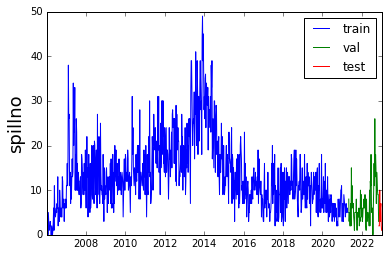

In [38]:
#plot the train,val,test split (weekly data)

plt.plot(data_train.index,data_train['spillno'])
plt.plot(data_val.index,data_val['spillno'])
plt.plot(data_test.index,data_test['spillno'])
plt.ylabel('spillno',fontsize=18)
plt.legend(['train','val','test'])
plt.show()


In [39]:
data_train

,spillno,month,year,quarter,week
incidentdate,,,,,
2006-01-08,4,1,2006,1,1
2006-01-15,2,1,2006,1,2
2006-01-22,3,1,2006,1,3
2006-01-29,0,1,2006,1,4
2006-02-05,5,2,2006,1,5
2006-02-12,3,2,2006,1,6
2006-02-19,1,2,2006,1,7
2006-02-26,2,2,2006,1,8
2006-03-05,2,3,2006,1,9


In [40]:
data_train.reset_index(inplace=True)
data_val.reset_index(inplace=True)
data_test.reset_index(inplace=True)

In [41]:
data_train.drop('incidentdate', axis=1, inplace=True)
data_val.drop('incidentdate',axis=1, inplace=True)
data_test.drop('incidentdate',axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
#Initialize h2o session
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_pc0235
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [43]:
# accessing H2OFlow UI
!npm install -g localtunnel -qq > /dev/null

In [44]:
get_ipython().system_raw('lt --port 54321 >> url.txt 2>&1 &')

In [45]:
#open the follwoing link to H2OFlow
!cat url.txt

In [46]:
#Convert pandas dataframes to h2o frames
hf_train = h2o.H2OFrame(data_train)
hf_val  = h2o.H2OFrame(data_val)
hf_test = h2o.H2OFrame(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [47]:
#Select response and features
y = 'spillno'
X = hf_train.columns
X.remove(y)

In [48]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_1_20230210_145619


Status of Neuron Layers: predicting spillno, regression, gaussian distribution, Quadratic loss, 281 weights/biases, 7.9 KB, 9,134 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  --------------------  -----------------------
    1        4        Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.0011699123526341282  0.0006462279707193375  0.0         0.024059564212802798  0.4030512571334839   0.47425048381586876   0.09796598553657532
    3        10       Rectifier  0.0        0.0   0.0   0.10302961431443691    0.2982586622238159     0.0         -0.0932320150360465   0.3814675807952881   1.0472119905376522    0.18157994747161865
    4        10       Rectifier  0.0        0.0   0.0   0.12530497224477585    0.3281189203262329     0.0         -0.03339935772120953  0.37911486625671387  0.9702174648292917    0.08529755473136902
    5        1        Linear                0.0   0.0   0.0020425202092155814  0.0030524805188179016  0.0         -0.12816015779972076  0.3856264352798462   0.044911084823369425  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 35.83833905322252
RMSE: 5.98651309638779
MAE: 4.695777640056217
RMSLE: 0.49467532402360276
Mean Residual Deviance: 35.83833905322252

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 41.96404372786338
RMSE: 6.477966017807084
MAE: 5.066395496243029
RMSLE: 0.5340940703776164
Mean Residual Deviance: 41.96404372786338

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     5.06599   0.677292   4.67999       4.91826       6.26661       4.72225       4.74285
mean_residual_deviance  41.9598   10.7934    36.6316       38.3095       61.1078       35.1539       38.5963
mse                     41.9598   10.7934    36.6316       38.3095       61.1078       35.1539       38.5963
r2                      0.336337  0.143683   0.334454      0.376904      0.0924296     0.452742      0.425155
residual_deviance       41.9598   10.7934    36.6316       38.3095       61.1078       35.1539       38.5963
rmse                    6.44014   0.778186   6.05241       6.18946       7.81715       5.92908       6.21259
rmsle                   0.532418  0.0464693  0.545928      0.533116      0.602378      0.493343      0.487326

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-02-10 14:56:52  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-02-10 14:56:52  1.786 sec   52812 obs/sec     1.05757   1             845        8.02373          64.3802              5.99268         -0.0179625
    2023-02-10 14:56:52  1.939 sec   56732 obs/sec     11.4318   11            9134       5.98651          35.8383              4.69578         0.433334

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
year        1                      1                    0.291425
month       0.8989

In [49]:
 #Check the leaderboard
## models are ranked by peformance on the test data since we specified a leadboard_frame

lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_1_AutoML_1_20230210_145619,2.87874,8.28714,2.6377,0.575011,8.28714
DeepLearning_grid_2_AutoML_1_20230210_145619_model_1,3.19627,10.2161,2.52539,nan,10.2161
StackedEnsemble_AllModels_5_AutoML_1_20230210_145619,3.20055,10.2435,2.85134,0.658946,10.2435
StackedEnsemble_BestOfFamily_4_AutoML_1_20230210_145619,3.27032,10.695,2.93307,0.677775,10.695
StackedEnsemble_BestOfFamily_6_AutoML_1_20230210_145619,3.31108,10.9633,2.95863,0.686541,10.9633
StackedEnsemble_BestOfFamily_5_AutoML_1_20230210_145619,3.32665,11.0666,2.8471,0.674643,11.0666
XGBoost_grid_1_AutoML_1_20230210_145619_model_20,3.43073,11.7699,2.97725,0.699521,11.7699
GBM_grid_1_AutoML_1_20230210_145619_model_12,3.51354,12.345,3.10605,0.725664,12.345
XGBoost_grid_1_AutoML_1_20230210_145619_model_2,3.51772,12.3743,2.98031,0.679865,12.3743
XGBoost_grid_1_AutoML_1_20230210_145619_model_45,3.53321,12.4835,3.02728,0.718938,12.4835


In [50]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 21600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_2_20230210_150619_model_89


Status of Neuron Layers: predicting spillno, regression, gaussian distribution, Quadratic loss, 601 weights/biases, 11.3 KB, 1,621,970 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight          weight_rms          mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  -------------------  ------------------  ------------------  -----------------------
    1        4        Input             10.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.0266670891363583     0.04911889135837555    0.0         0.08581961282368866  0.7227835655212402  0.8453584965341885  0.9501187801361084
    3        1        Linear                       0.0   0.0   0.0003196507188476971  0.0007402605842798948  0.0         -0.1720821843711019  0.641995906829834   0.9848376848742649  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 42.62645991779569
RMSE: 6.52889423392627
MAE: 5.116511077009096
RMSLE: 0.4843435762074328
Mean Residual Deviance: 42.62645991779569

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 42.27726918141655
RMSE: 6.502097290983621
MAE: 4.951910436289564
RMSLE: 0.4983166577340112
Mean Residual Deviance: 42.27726918141655

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     4.95243   0.338437   4.46496       4.98173       5.12745       4.8211        5.36691
mean_residual_deviance  42.2835   6.41925    34.8764       39.5972       50.5185       39.1382       47.2873
mse                     42.2835   6.41925    34.8764       39.5972       50.5185       39.1382       47.2873
r2                      0.331687  0.0576422  0.366345      0.355959      0.249702      0.390717      0.295713
residual_deviance       42.2835   6.41925    34.8764       39.5972       50.5185       39.1382       47.2873
rmse                    6.48771   0.491444   5.90562       6.29263       7.10764       6.25605       6.87658
rmsle                   0.498072  0.0186644  0.480648      0.507691      0.491637      0.484524      0.525863

Scoring History: 
    timestamp            duration     training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  -----------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2023-02-10 18:06:28  0.000 sec                      0         0             0            nan              nan                  nan             nan
    2023-02-10 18:06:28  2:59:25.062  58321 obs/sec     10        1             7990         10.676           113.977              8.60252         -0.802181
    2023-02-10 18:06:33  2:59:30.257  65971 obs/sec     440       44            351560       6.71504          45.0918              4.87093         0.287021
    2023-02-10 18:06:38  2:59:35.355  59787 obs/sec     780       78            623220       6.60903          43.6793              5.22506         0.309355
    2023-02-10 18:06:43  2:59:40.365  64205 obs/sec     1240      124           990760       6.49886          42.2352              5.06199         0.332189
    2023-02-10 18:06:49  2:59:45.586  57657 obs/sec     1490      149           1.19051e+06  6.89699          47.5684              5.56382         0.247861
    2023-02-10 18:06:54  2:59:50.617  57258 obs/sec     1840      184           1.47016e+06  6.54723          42.8662     

In [51]:
 #Check the leaderboard
## models are ranked by peformance on the test data since we specified a leadboard_frame

lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20230210_150619_model_89,2.75783,7.60562,2.32032,0.484348,7.60562
DeepLearning_grid_1_AutoML_2_20230210_150619_model_51,2.80301,7.85688,2.51194,0.527833,7.85688
DeepLearning_grid_3_AutoML_2_20230210_150619_model_3,2.82479,7.97944,2.48276,0.723921,7.97944
DeepLearning_grid_3_AutoML_2_20230210_150619_model_8,2.83563,8.04081,2.32297,0.512611,8.04081
DeepLearning_grid_1_AutoML_2_20230210_150619_model_49,2.86631,8.21572,2.58809,0.550341,8.21572
DeepLearning_grid_2_AutoML_2_20230210_150619_model_8,2.87712,8.27781,2.63651,0.574666,8.27781
XGBoost_grid_1_AutoML_2_20230210_150619_model_603,2.88785,8.33965,2.32135,0.496276,8.33965
XGBoost_grid_1_AutoML_2_20230210_150619_model_783,2.88876,8.34495,2.5523,0.595444,8.34495
StackedEnsemble_BestOfFamily_7_AutoML_2_20230210_150619,2.93024,8.58628,2.72146,0.585416,8.58628
XGBoost_grid_1_AutoML_2_20230210_150619_model_411,2.9426,8.6589,2.48636,0.535356,8.6589
